In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\customerchurn\customer_churn_dataset-testing-master.csv")

In [3]:
print(data.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [4]:
data = data.dropna()


In [5]:
data = pd.get_dummies(data, drop_first=True)


In [6]:
X = data.drop("Churn", axis=1)
y = data["Churn"]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8285825242718446
[[5592 1201]
 [1006 5076]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 0.9968155339805825


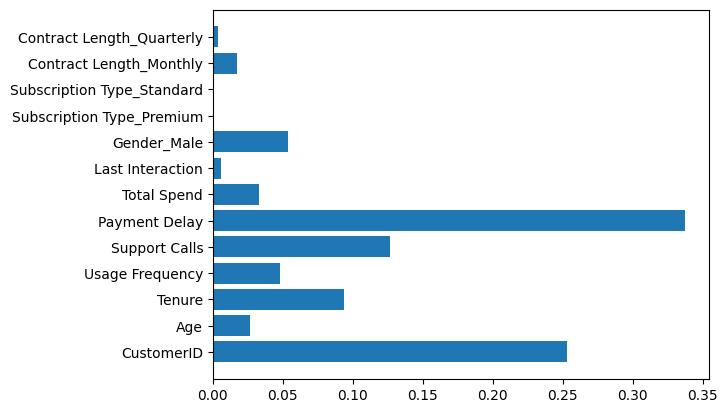

In [11]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.show()


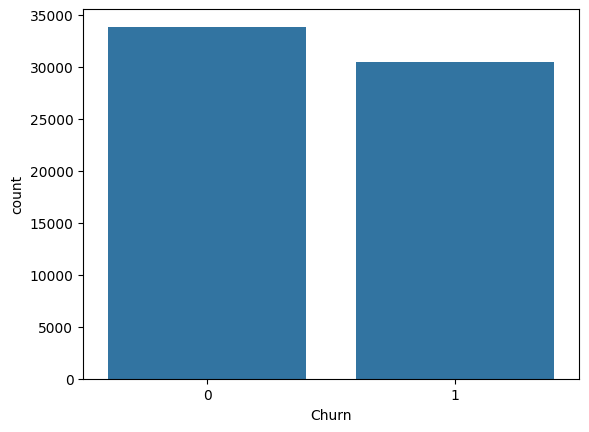

In [12]:
import seaborn as sns

sns.countplot(x="Churn", data=data)
plt.show()


In [13]:
import joblib

joblib.dump(rf, "churn_model.pkl")


['churn_model.pkl']

In [14]:
model = joblib.load("churn_model.pkl")
print(model.predict([X_test.iloc[0]]))


[0]


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
import joblib

# Save model
joblib.dump(rf, "churn_model.pkl")

# Save feature columns
joblib.dump(X.columns, "model_columns.pkl")

print("✅ Model and columns saved successfully")


✅ Model and columns saved successfully
